Enter the file path to be processed: bank_customer_data.csv

'Has Bad Payment Record' feature is imbalanced with 99% of its entries containing the value: 0.
'Accepted Personal Loan' feature is imbalanced with 87% of its entries containing the value: F.
'Accepted Retention' feature is imbalanced with 87% of its entries containing the value: F.
'Accepted Home Equity Loan' feature is imbalanced with 88% of its entries containing the value: F.
'Accepted Credit Card' feature is imbalanced with 88% of its entries containing the value: F.
'Interested in Personal Loan' feature is imbalanced with 96% of its entries containing the value: F.
'Interested in Retention' feature is imbalanced with 88% of its entries containing the value: F.
'Interested in Home Equity Loan' feature is imbalanced with 88% of its entries containing the value: F.
'Interested in Credit Card' feature is imbalanced with 89% of its entries containing the value: F.

Enter 1 to remove Has Bad Payment Record, 0 to keep it for f

,Age,Months as a Customer,Number of Products,RFM Score,Average Balance Feed Index,Number of Transactions,Personal Debt to Equity Ratio,Months Current Account,Number of Loan Accounts,Customer ID,...,Accepted Home Equity Loan_T,Accepted Credit Card_F,Accepted Credit Card_T,Gender_F,Gender_M,Marital Status_M,Marital Status_S,Marital Status_U,Homeowner_F,Homeowner_T
0,40,24.0,3,9.829,229,2,40,13,0,5409,...,0,1,0,1,0,0,1,0,1,0
1,47,12.0,2,11.808,8,1,47,5,2,5477,...,0,1,0,0,1,1,0,0,1,0
2,35,36.0,0,0.000,0,0,35,31,0,5507,...,1,0,1,1,0,0,0,1,0,1
3,45,0.0,0,0.000,0,0,45,-3,0,8,...,0,1,0,0,1,0,0,1,1,0
4,13,48.0,0,0.000,0,0,13,39,0,158,...,0,1,0,1,0,0,1,0,0,1


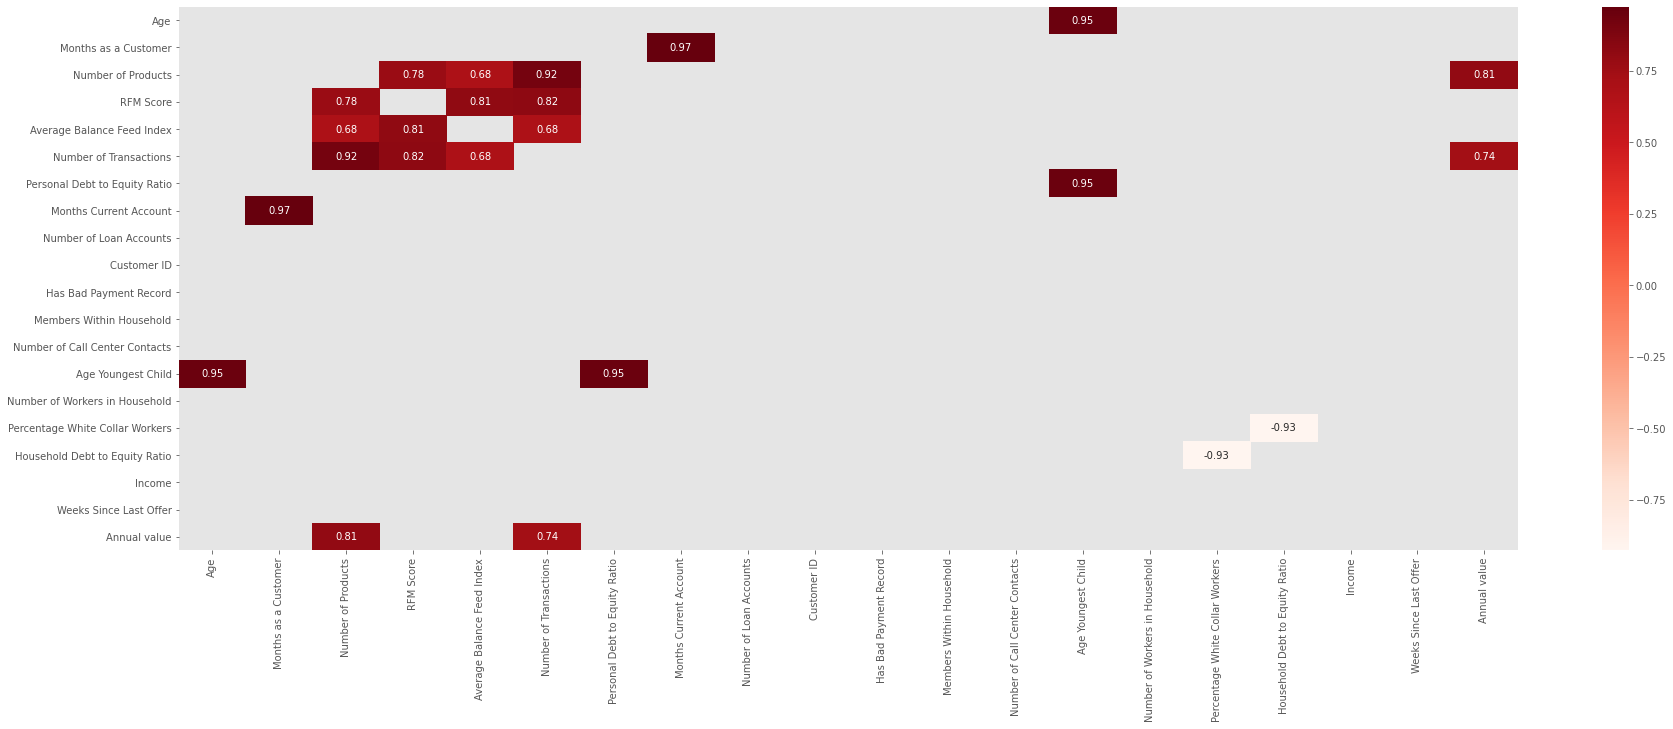

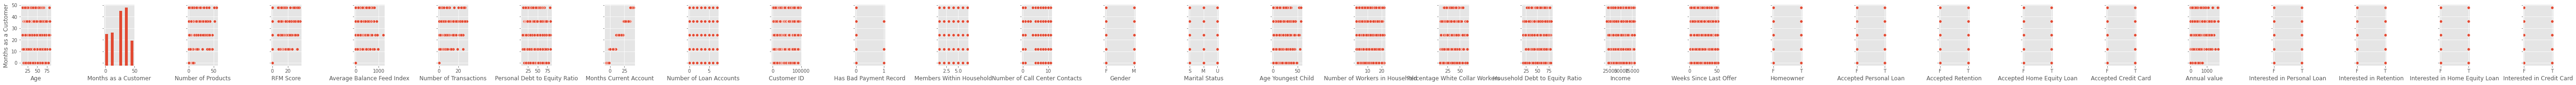

In [3]:
# %run AutoDataPrep.py
# %run Imbalanced.py

# if code is running on IBM Cloud Pak, comment out
%run AutoDataPrep.ipynb
%run Imbalanced.ipynb

import pandas as pd
from os.path import exists as file_exists



file_path = input("Enter the file path to be processed: ")
while not file_exists(file_path):
    file_path = input("Couldn't find the file. Enter the file path to be processed: ")

# if code is running on IBM Cloud Pak, uncomment
# from ibm_watson_studio_lib import access_project_or_space
# wslib = access_project_or_space()
# df = pd.read_csv(wslib.mount.get_data_path(file_path))
# df.head()

# if code is running on IBM Cloud Pak, comment and run
df = pd.read_csv(file_path)

imbalanced_dict, info_message = Imbalanced.handle(df)
cols_to_remove = []
print('\n' + info_message)
for key in imbalanced_dict.keys():
    txt = 'Enter 1 to remove ' + key + ', 0 to keep it for further analysis: '
    rem = int(input(txt))
    if rem == 1:
        cols_to_remove.append(key)
        
pipeline = AutoDataPrep(df, cols_to_remove)
pipeline.output.head()

